[View in Colaboratory](https://colab.research.google.com/github/PGrabinski/KerasTutorial/blob/master/Chapter6.ipynb)

# Chapter 6

## Working with text data

In [1]:
from keras.datasets import imdb
from keras import preprocessing

max_features = 10000
maxlen = 20

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = max_features)

x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

Using TensorFlow backend.


In [2]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(10000, 8, input_length = maxlen))
model.add(Flatten())
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split = 0.2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 4s 206us/step - loss: 0.6759 - acc: 0.6050 - val_loss: 0.6398 - val_acc: 0.6814
Epoch 2/10
16288/20000 [=======================>......] - ETA: 0s - loss: 0.5766 - acc: 0.7393

20000/20000 [==============================] - 3s 159us/step - loss: 0.5657 - acc: 0.7427 - val_loss: 0.5467 - val_acc: 0.7206
Epoch 3/10
20000/20000 [==============================] - 3s 160us/step - loss: 0.4752 - acc: 0.7808 - val_loss: 0.5113 - val_acc: 0.7384
Epoch 4/10
20000/20000 [==============================] - 3s 161us/step - loss: 0.4263 - acc: 0.8077 - val_loss: 0.5008 - val_acc: 0.7452
Epoch 5/10
20000/20000 [==============================] - 3s 162us/step - loss: 0.3930 - acc: 0.8258 - val_loss: 0.4981 - val_acc: 0.7538
Epoch 6/10
20000/20000 [==============================] - 3s 159us/step - loss: 0.3668 - acc: 0.8395 - val_loss: 0.5014 - val_acc: 0.7530
Epoch 7/10
   32/20000 [..............................] - ETA: 5s - loss: 0.2608 - acc: 0.8750

20000/20000 [==============================] - 3s 159us/step - loss: 0.3435 - acc: 0.8533 - val_loss: 0.5052 - val_acc: 0.7520
Epoch 8/10
20000/20000 [==============================] - 3s 158us/step - loss: 0.3223 - acc: 0.8657 - val_loss: 0.5132 - val_acc: 0.7486
Epoch 9/10
20000/20000 [==============================] - 3s 156us/step - loss: 0.3022 - acc: 0.8766 - val_loss: 0.5213 - val_acc: 0.7490
Epoch 10/10
20000/20000 [==============================] - 3s 158us/step - loss: 0.2839 - acc: 0.8860 - val_loss: 0.5303 - val_acc: 0.7466


In [25]:
!wget http://mng.bz/0tIo
!unzip -qq 0tIo
!ls

--2018-07-18 08:16:11--  http://mng.bz/0tIo
Resolving mng.bz (mng.bz)... 74.53.202.130
Connecting to mng.bz (mng.bz)|74.53.202.130|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 0 [text/plain]
Saving to: ‘0tIo.7’

0tIo.7                  [ <=>                ]       0  --.-KB/s    in 0s      

2018-07-18 08:16:11 (0.00 B/s) - ‘0tIo.7’ saved [0/0]

[0tIo]
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of 0tIo or
        0tIo.zip, and cannot find 0tIo.ZIP, period.
0tIo	0tIo.3	0tIo.6	 glove.6B.100d.txt  glove.6B.50d.txt  glove.6B.zip.2
0tIo.1	0tIo.4	0tIo.7	 glove.6B.200d.txt  glove.6B.zip      glove.6B.zip.3
0tIo.2	0tIo.5	datalab  glove.6B.300d.txt  glove.6B.zip.1    glove.6B.zip.4


In [7]:
import os
path = 'aclImdb/'
train = os.path.join(path, 'train')

labels = []
texts = []

for label_type in ['neg','pos']:
  dir_name = os.path.join(train, label_type)
  for fname in os.listdir(dir_name):
    if fname[-4:] == '.txt':
      with open(os.path.join(dir_name, fname)) as file:
        texts.append(file.read())
      if label_type == 'neg':
        labels.append(0)
      else:
        labels.append(1)

FileNotFoundError: ignored

### Tokenizing texts

In [20]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100
training_samples = 200
validation_samples = 10000
max_words = 10000

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print(f'Found {len(word_index)} unique tokens.')

data = pad_sequences(sequences, maxlen)
labels = np.asarray(labels)
print(f'Data tensor shape is {data.shape}')
print(f'Target tensor shape is {labels.shape}')

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]

x_val = data[training_samples:training_samples+validation_samples]
y_val = labels[training_samples:training_samples+validation_samples]

Found 0 unique tokens.
Data tensor shape is (0, 100)
Target tensor shape is (0,)


### Using pretrained embeddings

In [19]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -qo glove.6B.zip
!ls

--2018-07-18 07:57:19--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2018-07-18 07:57:19--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip.4’

glove.6B.zip.4      100%[===================>] 822.24M  47.2MB/s    in 16s     

2018-07-18 07:57:36 (51.4 MB/s) - ‘glove.6B.zip.4’ saved [862182613/862182613]

0tIo	0tIo.4	 glove.6B.100d.txt  glove.6B.zip    glove.6B.zip.4
0tIo.1	0tIo.5	 glove.6B.200d.txt  glove.6B.zip.1
0tIo.2	0tIo.6	 glove.6B.300d.txt  glove.6B.zip.2
0tIo.3	datalab  glove.6B.50d.txt   glove.6B.zip.3


In [7]:
gloves = 'glove.6B.100d.txt'

embeddings_index = {}
with open(gloves) as file:
  for line in file:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype=np.float32)
    embeddings_index[word] = coefs
print(f'Found {len(embeddings_index)} word vectors.')

Found 400000 word vectors.


In [0]:
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
  if i < max_words:
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
      embedding_matrix[i] = embedding_vector

In [9]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(optimizer='rmsprop', metrics=['acc'], loss='binary_crossentropy')
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val,y_val))
model.save_weights('pre_trained_glove.h5')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_2 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 320,065
Non-trainable params: 1,000,000
_________________________________________________________________
Train on 200 samples, validate on 24800 samples
Epoch 1/10
200/200 [==============================] - 3s 13ms/step - loss: 2.1256 - acc: 0.5100 - val_loss: 0.6969 - val_acc: 0.5392
Epoch 2/10
200/200 [==============================] - 2s 11ms/step - loss: 0.

AttributeError: ignored

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Valdiation loss')
plt.title('Training and valdiation loss')
plt.legend()

plt.show()

### Training own embedding

In [23]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val), batch_size=32)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_2 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
Train on 0 samples, validate on 0 samples
Epoch 1/10


AttributeError: ignored

In [0]:
import os
test_dir = os.path.join(imdb_dir, 'test')
test_labels = []
test_texts = []

for label_type in ['neg', 'pos']:
  dir_name = os.path.join(test_dir, label_type)
  for file_name in sorted(os.listdir(dir_name)):
    if file_name[-4:] == '.txt':
      with open(os.path.join(dir_name,file_name)) as file:
        test_texts.append(file.read())
      if label_type == 'neg':
        test_labels.append(0)
      else:
        test_labels.append(1)
        
test_sequeces = tokenizer.texts_to_sequences(test_texts)
x_test = pad_sequences(test_sequences, maxlen=maxlen)
y_test = np.asarray(test_labels)
model.load_weights('pre_trained_glove.h5')
model.evaluate(x_test, y_test)

## Understanding RNNs

In [0]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

### Simple RNN

In [30]:
from keras.models import Sequential
from keras.layers import Flatten, Embedding, Dense, SimpleRNN

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', metrics=['acc'], loss='binary_crossentropy')
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 49s 2ms/step - loss: 0.5731 - acc: 0.6923 - val_loss: 0.4774 - val_acc: 0.7776
Epoch 2/10
20000/20000 [==============================] - 49s 2ms/step - loss: 0.3638 - acc: 0.8504 - val_loss: 0.3855 - val_acc: 0.8380
Epoch 3/10
 9984/20000 [=============>................] - ETA: 22s - loss: 0.2705 - acc: 0.8939

20000/20000 [==============================] - 48s 2ms/step - loss: 0.2786 - acc: 0.8904 - val_loss: 0.3443 - val_acc: 0.8608
Epoch 4/10
20000/20000 [==============================] - 49s 2ms/step - loss: 0.2221 - acc: 0.9181 - val_loss: 0.3287 - val_acc: 0.8696
Epoch 5/10
20000/20000 [==============================] - 49s 2ms/step - loss: 0.1898 - acc: 0.9304 - val_loss: 0.3921 - val_acc: 0.8506
Epoch 6/10
  384/20000 [..............................] - ETA: 45s - loss: 0.1269 - acc: 0.9505

20000/20000 [==============================] - 49s 2ms/step - loss: 0.1403 - acc: 0.9493 - val_loss: 0.5067 - val_acc: 0.8304
Epoch 7/10
20000/20000 [==============================] - 48s 2ms/step - loss: 0.1091 - acc: 0.9636 - val_loss: 0.4794 - val_acc: 0.8204
Epoch 8/10
18432/20000 [==========================>...] - ETA: 3s - loss: 0.0703 - acc: 0.9760

20000/20000 [==============================] - 48s 2ms/step - loss: 0.0699 - acc: 0.9763 - val_loss: 0.5313 - val_acc: 0.7960
Epoch 9/10
20000/20000 [==============================] - 48s 2ms/step - loss: 0.0470 - acc: 0.9855 - val_loss: 0.4751 - val_acc: 0.8574
Epoch 10/10
20000/20000 [==============================] - 48s 2ms/step - loss: 0.0400 - acc: 0.9877 - val_loss: 0.5231 - val_acc: 0.8394


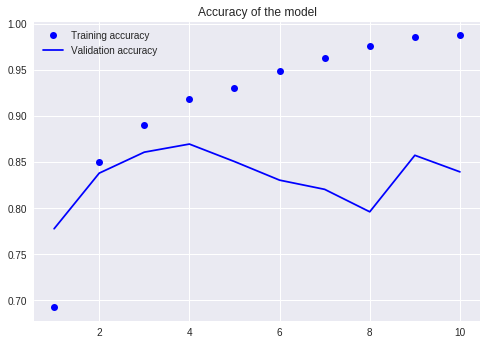

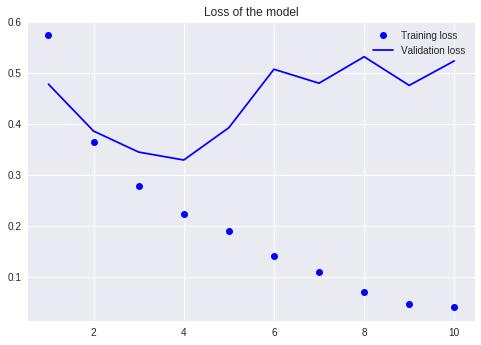

In [32]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Accuracy of the model')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.legend()
plt.title('Loss of the model')

plt.show()

### LSTM and GRU

In [34]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, LSTM, Embedding

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', metrics=['acc'], loss='binary_crossentropy')
history = model.fit(x_train, y_train, batch_size=128, epochs=10, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 185s 9ms/step - loss: 0.5577 - acc: 0.7382 - val_loss: 0.4109 - val_acc: 0.8314
Epoch 2/10
20000/20000 [==============================] - 183s 9ms/step - loss: 0.3260 - acc: 0.8696 - val_loss: 0.3527 - val_acc: 0.8514
Epoch 3/10
 9728/20000 [=============>................] - ETA: 1:28 - loss: 0.2441 - acc: 0.9081

20000/20000 [==============================] - 184s 9ms/step - loss: 0.2529 - acc: 0.9023 - val_loss: 0.3244 - val_acc: 0.8590
Epoch 4/10
20000/20000 [==============================] - 185s 9ms/step - loss: 0.2068 - acc: 0.9224 - val_loss: 0.4217 - val_acc: 0.8210
Epoch 5/10
20000/20000 [==============================] - 183s 9ms/step - loss: 0.1858 - acc: 0.9307 - val_loss: 0.3264 - val_acc: 0.8856
Epoch 6/10
  128/20000 [..............................] - ETA: 2:52 - loss: 0.1586 - acc: 0.9531

20000/20000 [==============================] - 184s 9ms/step - loss: 0.1684 - acc: 0.9401 - val_loss: 0.3079 - val_acc: 0.8832
Epoch 7/10
20000/20000 [==============================] - 184s 9ms/step - loss: 0.1525 - acc: 0.9453 - val_loss: 0.3915 - val_acc: 0.8786
Epoch 8/10
18176/20000 [==========================>...] - ETA: 15s - loss: 0.1422 - acc: 0.9507

20000/20000 [==============================] - 184s 9ms/step - loss: 0.1407 - acc: 0.9513 - val_loss: 0.3747 - val_acc: 0.8506
Epoch 9/10
20000/20000 [==============================] - 185s 9ms/step - loss: 0.1280 - acc: 0.9565 - val_loss: 0.4967 - val_acc: 0.8352
Epoch 10/10
20000/20000 [==============================] - 184s 9ms/step - loss: 0.1196 - acc: 0.9582 - val_loss: 0.3555 - val_acc: 0.8816


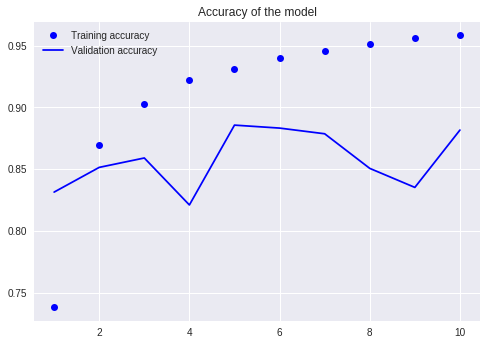

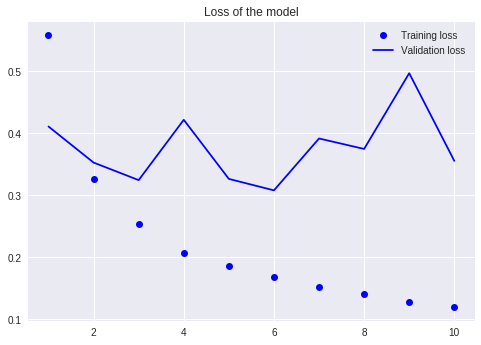

In [37]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Accuracy of the model')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.legend()
plt.title('Loss of the model')

plt.show()

## Timeseries

In [1]:
!wget -nc https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
!unzip -qo jena_climate_2009_2016.csv.zip
!ls

--2018-07-18 13:29:41--  https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.17.203
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.17.203|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13568290 (13M) [application/zip]
Saving to: ‘jena_climate_2009_2016.csv.zip’

jena_climate_2009_2 100%[===================>]  12.94M  3.80MB/s    in 3.4s    

2018-07-18 13:29:45 (3.80 MB/s) - ‘jena_climate_2009_2016.csv.zip’ saved [13568290/13568290]

datalab  jena_climate_2009_2016.csv  jena_climate_2009_2016.csv.zip


In [0]:
import os
weather_dir = ''
filename = os.path.join(weather_dir, 'jena_climate_2009_2016.csv')

with open(filename) as file:
  data = file.read()
  
data = data.split('\n')
header = data[0].split(',')
lines = data[1:]

import numpy as np

weather = np.zeros((len(lines), len(header) - 1))
for i, line in enumerate(lines):
  values = [float(x) for x in line.split(',')[1:]]
  weather[i,:] = values  

In [0]:
mean = weather[:200000].mean(axis=0)
weather -= mean
std = weather[:200000].std(axis=0)
weather /= std

In [0]:
def generator(data, lookback, delay, min_index, max_index, shuffle=False, batch_size=128, step=6):
  if max_index is None:
    max_index = len(data) - delay - 1
  i = min_index + lookback
  while True:
    if shuffle:
      rows = np.random.randint(min_index + lookback, max_index, size=batch_size)
    else:
      if i + batch_size >= max_index:
        i = min_index + lookback
      rows = np.arange(i, min(i + batch_size, max_index))
      i += len(rows)
    samples = np.zeros((len(rows), lookback//step, data.shape[-1]))
    targets = np.zeros((len(rows),))
    for j, row in enumerate(rows):
      indices = range(rows[j] - lookback, rows[j], step)
      samples[j] = data[indices]
      targets[j] = data[rows[j] + delay][1]
    yield samples, targets

In [0]:
lookback = 1440
step = 6
delay = 144
batch_size = 128

In [0]:
train_gen = generator(weather, lookback=lookback, delay=delay, min_index=0, max_index=200000, shuffle=True, step=step, batch_size=batch_size)
val_gen = generator(weather, lookback=lookback, delay=delay, min_index=200001, max_index=300000, shuffle=True, step=step, batch_size=batch_size)
test_gen = generator(weather, lookback=lookback, delay=delay, min_index=300001, max_index=None, shuffle=True, step=step, batch_size=batch_size)

In [0]:
val_steps = (300000 - 200001 - lookback)
test_steps = (len(weather) - 300001 - lookback)

### Naive prediction

In [84]:
def naive_prediction_mae():
  batch_maes = []
  for step in range(val_steps):
    samples, targets = next(val_gen)
    preds = samples[:,-1, 1]
    mae = np.mean(np.abs(preds - targets))
    batch_maes.append(mae)
  return np.mean(batch_maes)
np_mae = naive_prediction_mae()
print(f'The naive apporach has a normalized MAE of {np_mae}')
print(f'The real world MAE is {np_mae * std[1]}')

The naive apporach has a normalized MAE of 0.2895004181246828
The real world MAE is 2.5628021857466083


### Simple dense network

In [0]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
model.add(Flatten(input_shape=(lookback//step, weather.shape[-1])))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='rmsprop', metrics=['mae'], loss='mae')
history = model.fit_generator(train_gen, epochs=20, steps_per_epoch=500, validation_data=val_gen, validation_steps=val_steps)

import matplotlib.pyplot as plt
mae = history.history['loss']
val_mae = history.history['val_loss']

epochs = range(1, len(mae) + 1)

plt.figure()
plt.plot(epochs, mae, 'bo', label='Training loss')
plt.plot(epochs, val_mae, 'b', label='Validation loss')
plt.title('Mean Absolute Error')
plt.legend()

plt.show()

Epoch 1/20
496/500 [============================>.] - ETA: 0s - loss: 1.0671 - mean_absolute_error: 1.0671

### GRU

In [0]:
from keras.models import Sequential
from keras.layers import Dense, GRU

model = Sequential()
model.add(GRU(32, input_shape=(None, weather.shape[-1])))
model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mae')
history = model.fit_generator(train_gen, epochs=20, steps_per_epoch=20, validation_data=val_gen, validation_steps=val_steps)

In [0]:
import matplotlib.pyplot as plt
mae = history.history['loss']
val_mae = history.history['val_loss']

epochs = range(1, len(mae) + 1)

plt.figure()
plt.plot(epochs, mae, 'bo', label='Training loss')
plt.plot(epochs, val_mae, 'b', label='Validation loss')
plt.title('Mean Absolute Error')
plt.legend()

plt.show()

### Dropout

In [0]:
from keras.models import S